Using the networkx implementation, apply the Givan-Newman method for finding different components to the following graphs:

- A graph with 40 nodes constructed using the Barabasi-Albert method
- A graph with 40 nodes constructed using the Watts-Strogatz method
- A graph with 40 nodes constructed using the Erdos-Renyi method
- The karate graph

Describe what you see and why

In [4]:
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman

In [60]:
G_ba = nx.barabasi_albert_graph(40, 3)
G_ws = nx.watts_strogatz_graph(40, 4, .25)
G_er = nx.erdos_renyi_graph(40, .1)
G_ka = nx.karate_club_graph()

In [61]:
C_ba = girvan_newman(G_ba)
C_ws = girvan_newman(G_ws)
C_er = girvan_newman(G_er)
C_ka = girvan_newman(G_ka)

In [62]:
# Get first pair of communities
C1_ba = tuple(sorted(c) for c in next(C_ba))    
C1_ws = tuple(sorted(c) for c in next(C_ws))    
C1_er = tuple(sorted(c) for c in next(C_er))   
C1_ka = tuple(sorted(c) for c in next(C_ka))    

In [48]:
def get_color_map(G, communities):
    color_map = []
    # Assumning two communities
    for node in G:
        if node in communities[0]:
            color_map.append("green")
        elif node in communities[1]:
            color_map.append("red")
        else:
            color_map.append("blue")
    return color_map
        

### Barabasi-Albert

Here we see the communities split based on how closely the nodes are connected to the nodes with the highest degree. Since nodes 38 and 22 aren't as connected to the early nodes, they are isolated in their own community. 

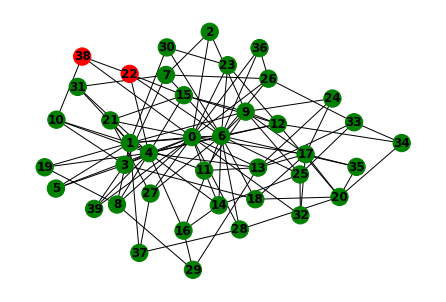

In [52]:
nx.draw(G_ba, with_labels=True, font_weight="bold", node_color=get_color_map(G_ba, C1_ba))

### Wass-Strogatz

Here we see that the community boundaries have been found along a set of local bridges. This is caused by starting off with a ring where each node is connected to its 4 nearest neighbors. There is a 25% chance that each node will be replaced with a connection to a random node (most likely not a close neighbor). The algorithm inherently leads to a series of local bridges that are likely to have high betweeness. 

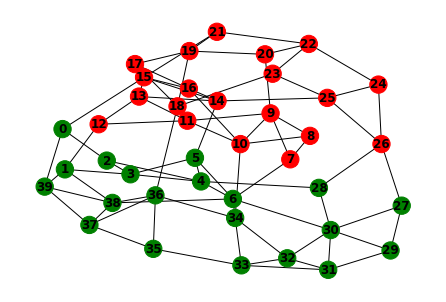

In [63]:
nx.draw(G_ws, with_labels=True, font_weight="bold", node_color=get_color_map(G_ws, C1_ws))

### Erdos-Reyni

Erdos-Reyni creates a random graph. Therefore, it seems reasonable that the two communities with highest betweeness would we random as well. It seems that the communities once again form along local bridges.

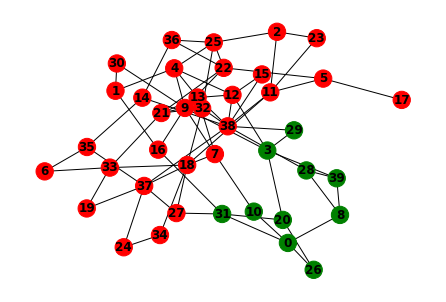

In [54]:
nx.draw(G_er, with_labels=True, font_weight="bold", node_color=get_color_map(G_er, C1_er))

### Karate Club

The Karate Club graph seems to have relatively few local bridges and low betweeness. However, it appears that a few individuals tend to be the most central in the graph acting as a connective tissue between two communities.

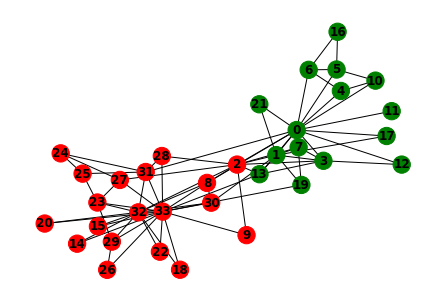

In [55]:
nx.draw(G_ka, with_labels=True, font_weight="bold", node_color=get_color_map(G_ka, C1_ka))